In [29]:
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import from_networkx, to_networkx
import numpy as np

In [25]:
def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2", font_color="white")
    plt.show()

In [26]:
a = np.random.randint(0, 2, size=(10, 10))
D = nx.DiGraph(a)

In [30]:
pyg_graph = from_networkx(D)

In [31]:
pyg_graph.edge_index

tensor([[0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4,
         4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8,
         8, 9, 9, 9, 9, 9],
        [0, 1, 2, 4, 5, 6, 2, 5, 8, 2, 3, 4, 5, 6, 7, 0, 2, 3, 4, 1, 3, 4, 6, 7,
         9, 0, 2, 3, 4, 5, 6, 8, 1, 2, 7, 9, 0, 3, 4, 5, 7, 8, 1, 2, 3, 4, 5, 8,
         9, 1, 4, 6, 8, 9]])

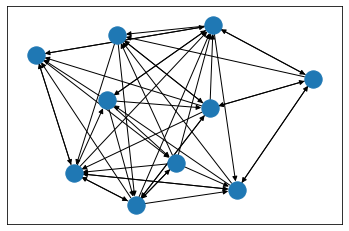

In [43]:
G_back = to_networkx(pyg_graph, remove_self_loops=True)
nx.draw_networkx(G_back, pos=nx.spring_layout(G_back, seed=42), with_labels=False, cmap="Set2", font_color="white")

In [42]:
pyg_graph.x